In [1]:
import torch as th
from torch import nn
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [2]:
class LinearRegression(nn.Module):
    def __init__(self, device="cpu"):
        self.weights = None
        self.device = device

    def fit(self, X, y):
        # Go ahead and rock it!
        X = X.to(self.device)
        X = X.to(self.device)
        
        X = th.cat([X, th.ones_like(y).to(self.device)], dim=1)

        rows, cols = X.size()
        self.weights = th.matmul(
            th.matmul(
                th.inverse(
                    th.matmul(
                        th.transpose(X, 0, 1),
                        X)),
                th.transpose(X, 0, 1)),
            y)

    def predict(self, X):
        # Write your inference here!
        X = th.cat([X, th.ones((X.size()[0], 1))], dim=1)
        return th.matmul(X, self.weights)

In [3]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, bias=1, noise=35)
y = y.reshape((-1, 1))

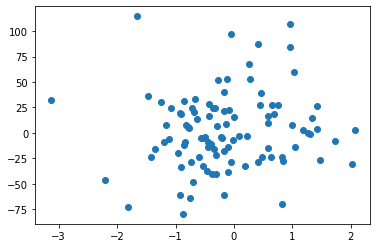

In [4]:
plt.scatter(X, y)

In [5]:
lin_reg = LinearRegression()
X, y = th.from_numpy(X), th.from_numpy(y)
lin_reg.fit(X, y)

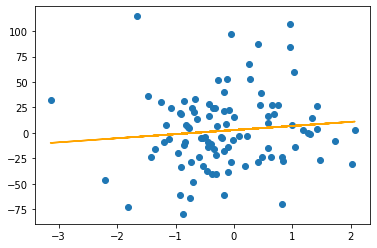

In [6]:
plt.scatter(X, y)
plt.plot(X.numpy(), lin_reg.predict(X), color='orange')

In [7]:
from time import time

no_inputs = [10**i for i in range(2, 8)]
results_torch = []

#Let's benchmark it!
for no_samples in no_inputs:
    X, y = make_regression(n_samples=no_samples, n_features=10, n_informative=7, bias=1, noise=100)
    y = y.reshape((-1, 1))
    X, y = th.from_numpy(X), th.from_numpy(y)

    lin_reg = LinearRegression()
    start = time()    
    lin_reg.fit(X, y)
    end = time()
    results_torch.append(end - start)

[[  40.50088168]
 [ 270.1664973 ]
 [ -51.62850716]
 [ -35.48732079]
 [ 183.28739537]
 [  -0.49296158]
 [ 384.35167162]
 [ 249.81802775]
 [ -35.02408816]
 [-132.84777155]
 [  45.81618377]
 [ -24.03796733]
 [  65.24518754]
 [-200.27157186]
 [  35.41578742]
 [-123.03436803]
 [ 210.08419882]
 [ 157.5507756 ]
 [  77.57049526]
 [-250.0088543 ]
 [ 311.87832718]
 [  19.74995924]
 [-359.48609209]
 [ 119.39910167]
 [  59.97240105]
 [ -40.16456105]
 [-304.49305622]
 [  76.4787164 ]
 [ 107.45451576]
 [-166.04207813]
 [ 286.42884279]
 [  19.90923309]
 [ -10.99147086]
 [ -72.19641681]
 [-100.25803279]
 [-173.71665975]
 [ -47.94034739]
 [-174.89421318]
 [ -32.53272863]
 [ -94.41027629]
 [  96.76989905]
 [-175.89333156]
 [  70.9126452 ]
 [-153.75922738]
 [ -22.86699121]
 [-177.53840724]
 [ -52.6655913 ]
 [ 120.1333836 ]
 [ 250.99753701]
 [-139.68738112]
 [  43.36801237]
 [ 246.80385394]
 [  77.43818826]
 [ 114.36035236]
 [  68.90776738]
 [ 145.93010603]
 [  81.23584375]
 [ 215.8232391 ]
 [ 214.3887142

[[ -60.75564779]
 [-382.82303626]
 [-138.22220231]
 ...
 [-304.54334074]
 [ -11.84135835]
 [ -99.95218801]]
[[-237.23898871]
 [ 186.4377006 ]
 [ 132.86978883]
 ...
 [   0.59038993]
 [ -71.08275883]
 [-108.08547933]]


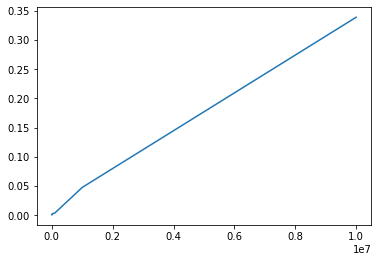

In [8]:
plt.plot(no_inputs, results_torch)

In [9]:
import numpy as np

class NumpyLinearRegression:
    def __init__(self):
        self.weights = None
        
    
    def fit(self, X, y):
        # Go ahead and rock it!
        X = np.column_stack((X, np.ones_like(y)))
        rows, cols = X.shape
    
        self.weights = np.matmul(
            np.matmul(
                np.linalg.inv(
                    np.matmul(
                        np.transpose(X),
                        X)),
                np.transpose(X)),
            y)

    def predict(self, X):
        X = np.column_stack((X, np.ones_like(y)))
        return np.matmul(X, self.weights)


In [10]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=7, bias=1, noise=100)
np_lin_reg = NumpyLinearRegression()
np_lin_reg.fit(X, y)

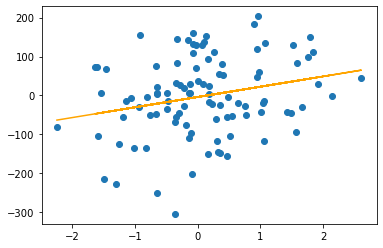

In [11]:
plt.scatter(X, y)
plt.plot(X, np_lin_reg.predict(X), color='orange')

In [17]:
results_numpy = []

#Let's benchmark it!
for no_samples in no_inputs:
    X, y = make_regression(n_samples=no_samples, n_features=10, n_informative=7, bias=1, noise=100)
    reg = NumpyLinearRegression()
    start = time()    
    reg.fit(X, y)
    end = time()
    results_numpy.append(end - start)

In [18]:
results_torch_cuda = []
for no_samples in no_inputs:
    X, y = make_regression(n_samples=no_samples, n_features=10, n_informative=7, bias=1, noise=100)
    y = y.reshape((-1, 1))
    reg = LinearRegression(device="cuda")
    X, y = th.from_numpy(X), th.from_numpy(y)
    X = X.cuda()
    y = y.cuda()
    start = time()
    reg.fit(X, y)
    end = time()
    results_torch_cuda.append(end - start)

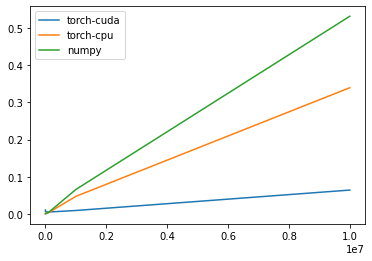

In [19]:
plt.plot(no_inputs, results_torch_cuda, label="torch-cuda")
plt.plot(no_inputs, results_torch, label="torch-cpu")
plt.plot(no_inputs, results_numpy, label="numpy")
plt.legend()